In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import pandas as pd
import numpy as np

In [2]:
# Загружаем датасет
data = pd.read_csv('heart.csv')

In [3]:
# Первые 10 строчек датасета
data.head(n=10)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Проверяем датасет на пропущенные значения
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Проверяем датасет на наличие повторяющихся строк
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
# Проводим анализ датасета с помощью различной информации о значениях столбцов
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# По таблице видно что некоторые данные в таблице являются категоризированными, а некоторые непрерывными, мы их разделяем 
# для последующего анализа


# Категоризированные данные
class_cols = ["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data = data[class_cols]

# Непрерывные данные
continuous_cols = ["age","trtbps","chol","thalachh","oldpeak"]
continuous_data = data[continuous_cols]




<Axes: xlabel='output', ylabel='count'>

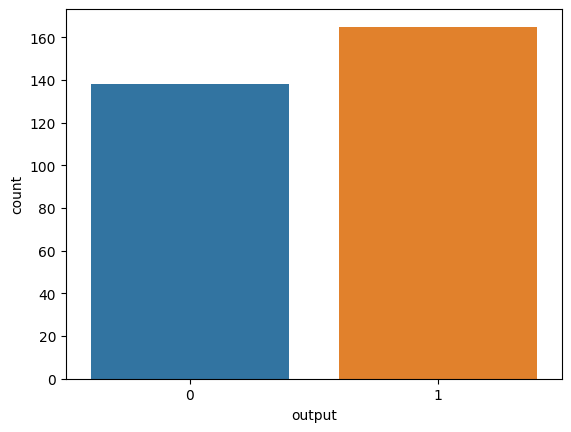

In [8]:
# Анализ категоризированных данных

sns.countplot(x = class_data["output"])
# Риск сердечного приступа

<Axes: xlabel='sex', ylabel='count'>

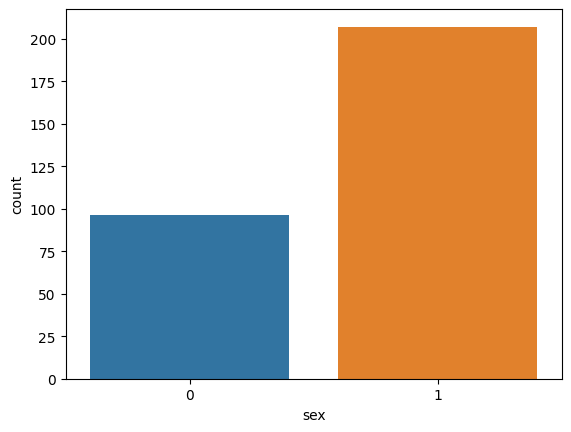

In [9]:
sns.countplot(x = class_data["sex"])
# Пол

<Axes: xlabel='cp', ylabel='count'>

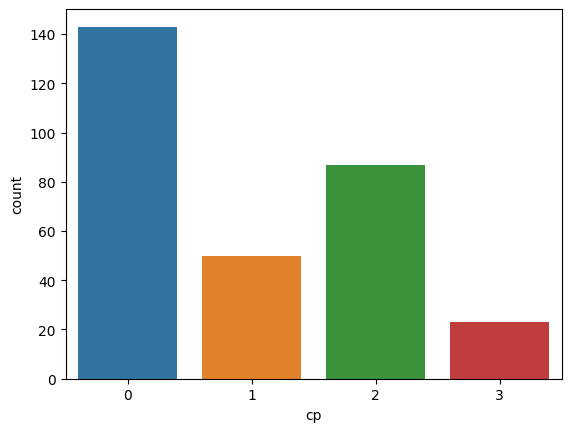

In [10]:
sns.countplot(x = class_data["cp"])
# Тип боли в груди.

<Axes: xlabel='fbs', ylabel='count'>

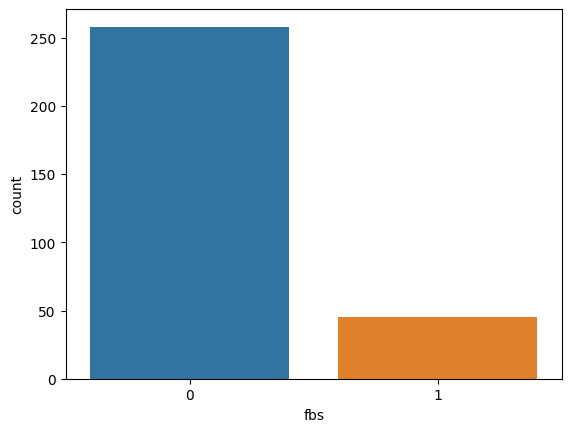

In [11]:
sns.countplot(x = class_data["fbs"])
# Уровень сахара в крови натощак > 120 мг / дл (1 = True; 0 = False)

<Axes: xlabel='exng', ylabel='count'>

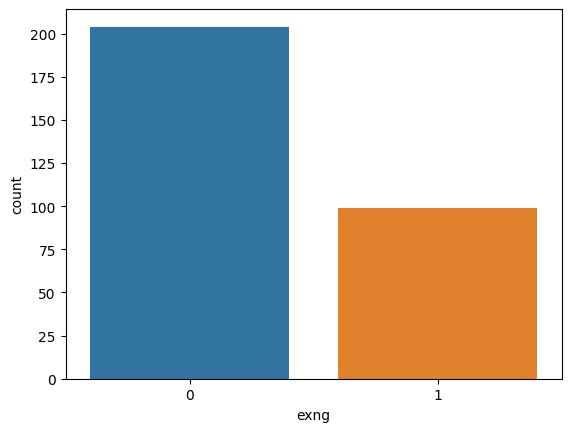

In [12]:
sns.countplot(x = class_data["exng"])
# Стенокардия, вызванная физической нагрузкой (1 = true; 0 = false)

<Axes: xlabel='restecg', ylabel='count'>

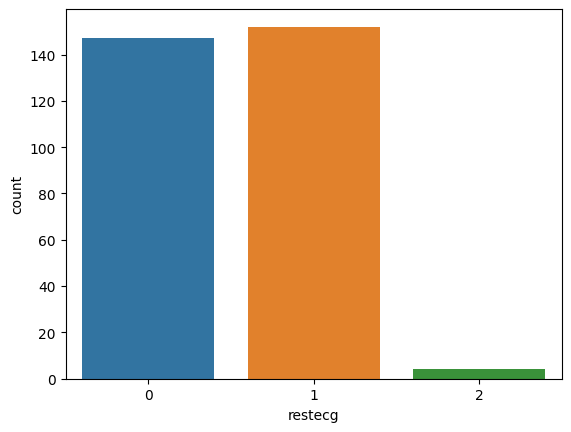

In [13]:
sns.countplot(x = class_data["restecg"])
# Результаты электрокардиографии в состоянии покоя

<Axes: xlabel='thall', ylabel='count'>

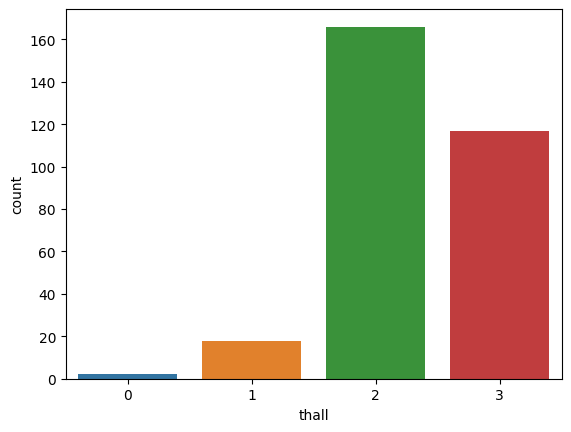

In [14]:
sns.countplot(x = class_data["thall"])
# Неизвестный параметр.

<Axes: xlabel='caa', ylabel='count'>

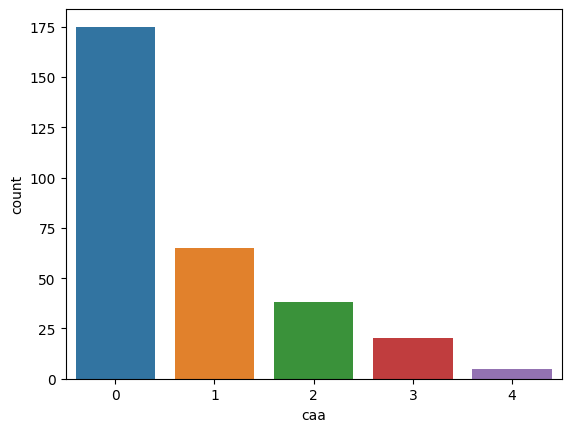

In [15]:
sns.countplot(x = class_data["caa"])
# Количество крупных сосудов

<Axes: xlabel='slp', ylabel='count'>

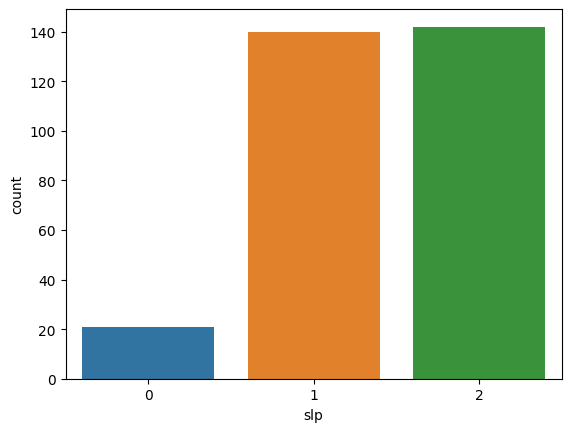

In [16]:
sns.countplot(x = class_data["slp"])
# Неизвестный параметр

C:\Users\alexau\AppData\Local\Temp\ipykernel_8516\870133537.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continuous_data["age"])


<Axes: xlabel='age', ylabel='Density'>

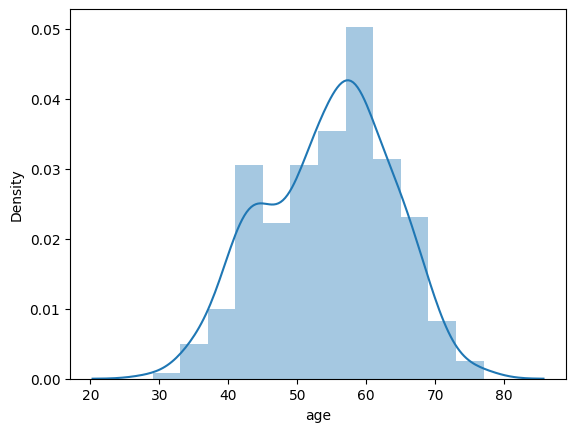

In [17]:
# Непрерывные данные

sns.distplot(continuous_data["age"])
# Возраст

C:\Users\alexau\AppData\Local\Temp\ipykernel_8516\1962584824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continuous_data["trtbps"])


<Axes: xlabel='trtbps', ylabel='Density'>

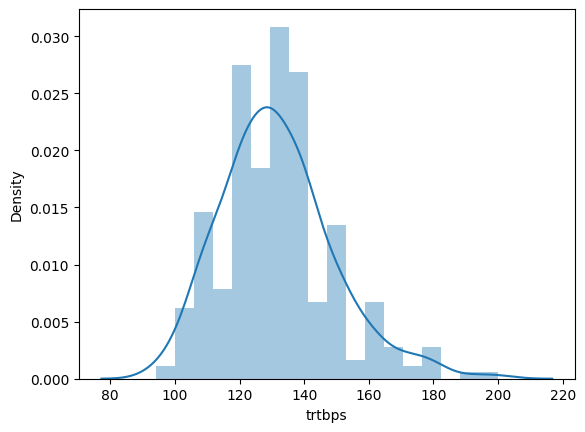

In [18]:
sns.distplot(continuous_data["trtbps"])
# Артериальное давление в состоянии покоя (в мм рт. ст.)

C:\Users\wipeo\AppData\Local\Temp\ipykernel_6840\767654367.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continuous_data["chol"])


<AxesSubplot: xlabel='chol', ylabel='Density'>

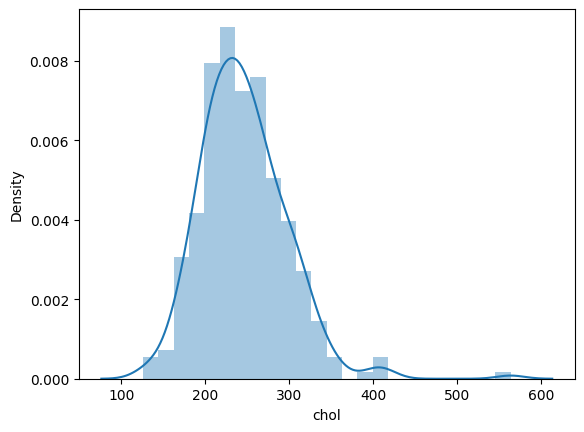

In [58]:
sns.distplot(continuous_data["chol"])
# Холесторал в мг / дл, определяемый с помощью датчика ИМТ

C:\Users\wipeo\AppData\Local\Temp\ipykernel_6840\2140573102.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continuous_data["thalachh"])


<AxesSubplot: xlabel='thalachh', ylabel='Density'>

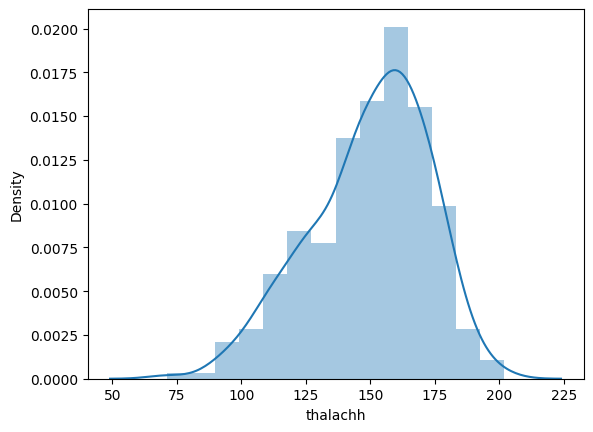

In [59]:
sns.distplot(continuous_data["thalachh"])
# Неизвестный параметр

C:\Users\wipeo\AppData\Local\Temp\ipykernel_6840\3386110290.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continuous_data["oldpeak"])


<AxesSubplot: xlabel='oldpeak', ylabel='Density'>

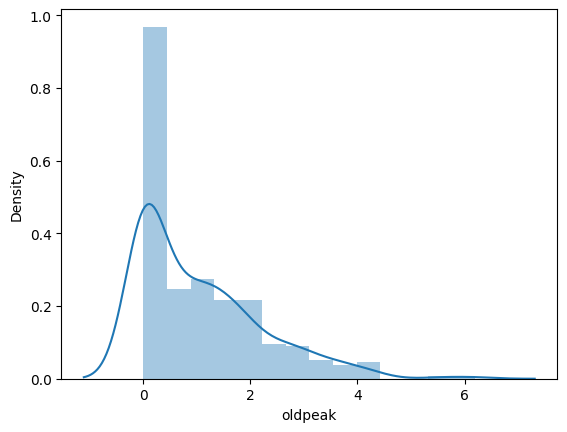

In [60]:
sns.distplot(continuous_data["oldpeak"])
# Неизвестный параметр

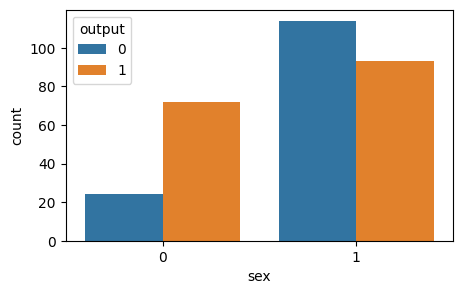

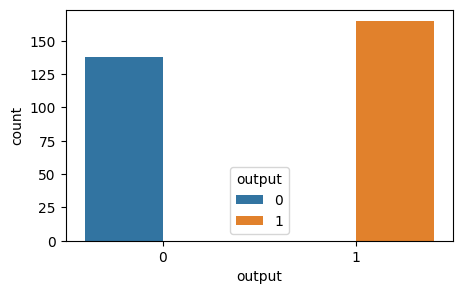

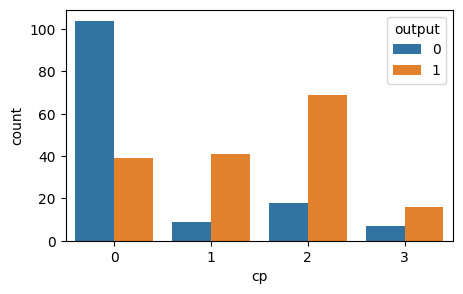

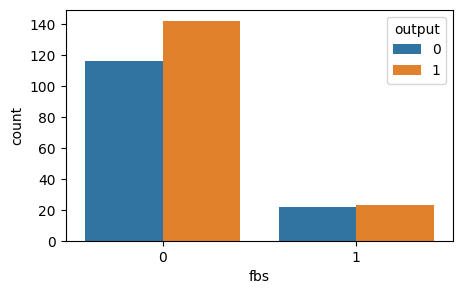

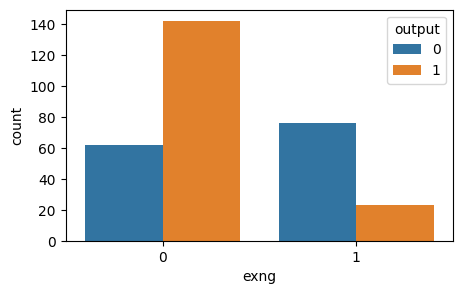

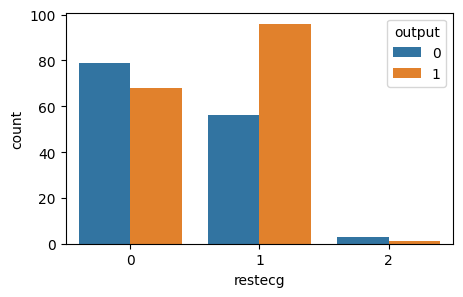

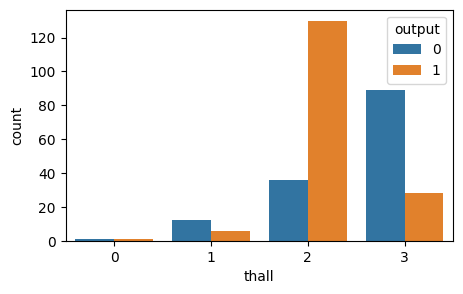

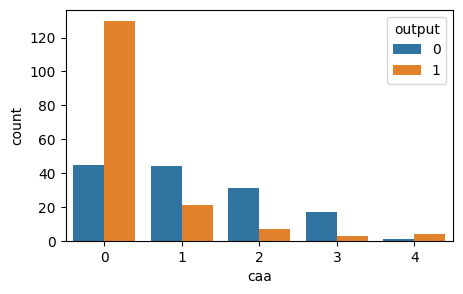

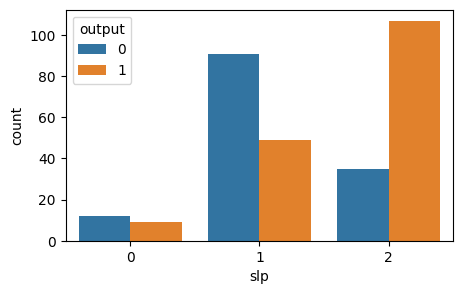

In [61]:
# Все категориальные данные относительно output

for col in class_data:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=class_data, hue="output")

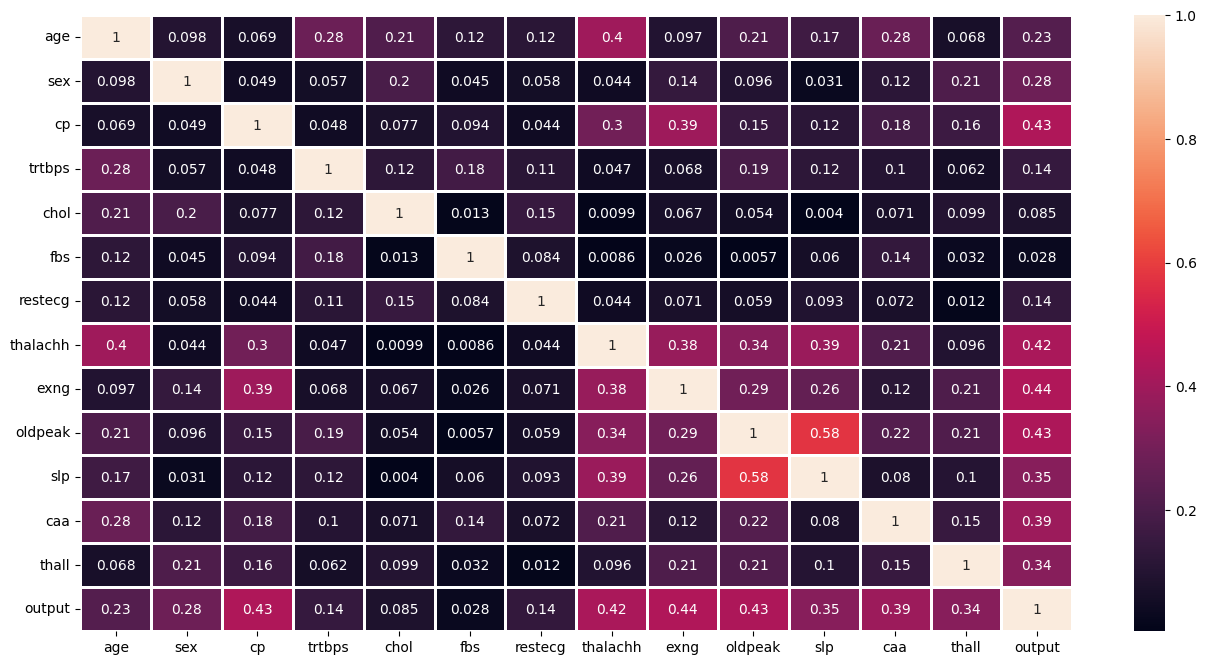

fbs         0.028046
chol        0.085239
restecg     0.137230
trtbps      0.144931
age         0.225439
sex         0.280937
thall       0.344029
slp         0.345877
caa         0.391724
thalachh    0.421741
oldpeak     0.430696
cp          0.433798
exng        0.436757
output      1.000000
Name: output, dtype: float64


In [62]:
# Построим график корреляции между признаками для выявления нужных столбцов и столбцов которые можно исключить

plt.figure(figsize=(16,8))
corr = data.corr()
sns.heatmap(abs(corr), lw=2, annot=True)
plt.show()

print(abs(corr["output"]).sort_values())

In [63]:
# Проверяем кол-во выбросов в столбцах (значения которые превышают межкваyтильный диапазон в 1.5 раза)

for key, value in continuous_data.items():
        Q1 = value.quantile(0.25)
        Q3 = value.quantile(0.75)
        irq = Q3 - Q1

        lower_limit = Q1 - 1.5 * irq
        upper_limit = Q3 + 1.5 * irq

        v_col = value[(value <= lower_limit) | (value >= upper_limit)]

        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print(f"В столбце {key} выбросов: {len(v_col)} ({round((perc),3)} %)")

В столбце age выбросов: 0 (0.0 %)
В столбце trtbps выбросов: 13 (4.29 %)
В столбце chol выбросов: 5 (1.65 %)
В столбце thalachh выбросов: 1 (0.33 %)
В столбце oldpeak выбросов: 8 (2.64 %)


In [64]:
# Препроцессинг
# Для минимизации выбросов мы берем натуральный логарифм значений тем самым минимизируем выбросы
data["age"] = np.log(data.age)
data["trtbps"] = np.log(data.trtbps)
data["chol"] = np.log(data.chol)
data["thalachh"] = np.log(data.thalachh)
continuous_data = data[continuous_cols]

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Разделение данных
X = data.iloc[:,:13]
Y = data["output"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=60) 

# Скалирование данных в нужный диапазон (в нашем случае от 0 до 1)
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support as score
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

def compute(Y_pred,Y_test):
    # Выходной график

    # Создание графика с размером (12,6)
    plt.figure(figsize=(12,6))

    # Создание точек графика желтого цвета (Предсказанное) из результатов предсказания
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Предсказанное")

    # Создание точек графика красного цвета (Действительное) из действительного статуса респондента
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Действительное") 

    # Название графика
    plt.title("Предсказанные значения и действительные значения")

    # Создание легенды графика из labels
    plt.legend() 
    # Отображение графика
    plt.show() 




    # Матрица ошибок

    # Вычисление матрицы ошибок
    cm=confusion_matrix(Y_test,Y_pred)
    
    # Наименование строк и столбцов в Dataframe
    class_label = ["High-risk", "Low-risk"]  

    # Создание Dataframe из высчитанной матрицы ошибок с class_label как названия для строк и столбцов
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)  

    # Создание графика хитмапа из confusion matrix dataframe с записью данных в каждую ячейку с колормэпом 
    # Pastel1, промежуточным разделителем ячеек шириной 2 и форматированием данных внутри ячейки как цифр
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')  

    # Создание названия и осей для графика хитмапа
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Вычисление метрик

    # Вычисление accuracy (отношение верных к неверным)
    acc=accuracy_score(Y_test,Y_pred)

    # Вычисление MSE (Среднее арифметическое квадратов разностей между предсказанными и реальными значениями)
    # Величина характеризует отклонение отдельного единичного измерения от истинного значения.
    mse=mean_squared_error(Y_test,Y_pred)

    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

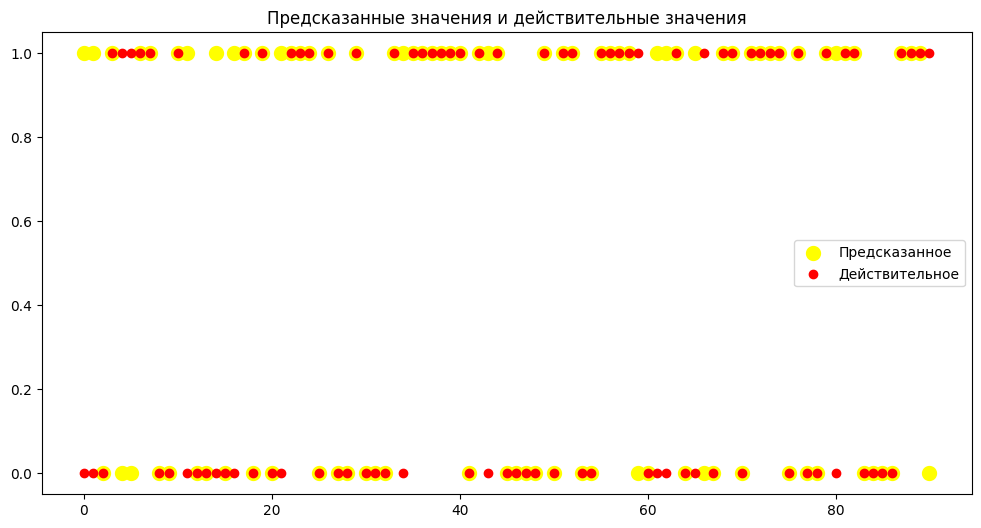

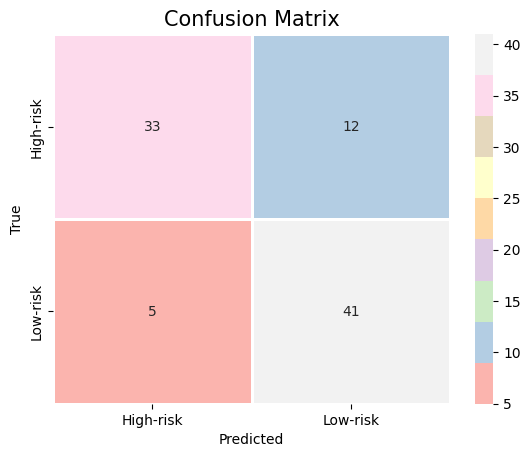

Precision: 0.774 
Recall: 0.891 
F1-Score: 0.828 
Accuracy: 81.319 %
Mean Square Error: 0.187
                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.87
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           1.39e-38
Time:                        21:04:18   Log-Likelihood:                -108.20
No. Observations:                 303   AIC:                             244.4
Df Residuals:                     289   BIC:                             296.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [77]:
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import ols

# Создаем модель

# Модель логистической регрессии с перемешиванием данных по 10 элементов (random_state)
# С алгоритмом обучения saga, количеством итераций 100 и L2 регуляризацией (перемешивание весов при помощи суммирования их квадратов)
# bias=True (fit_intercept)
model_Log = LogisticRegression(random_state=10, solver='saga', penalty='l2')
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

# График и вычисление метрик
compute(Y_pred,Y_test)

# Модель логистической регрессии с указанием результирующего параметра и его составляющих для вычисления метрик Durbin-Watson, p_value, t_st
model = ols(formula='output ~ age + sex + cp + trtbps + chol + fbs + restecg + thalachh + exng + oldpeak + slp + caa + thall' , data=data).fit()
print(model.summary())

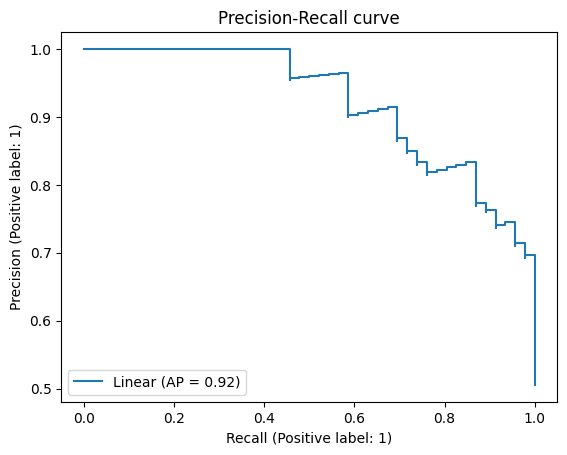

In [78]:
from sklearn.metrics import PrecisionRecallDisplay

# Подсчет площади под pr кривой
display = PrecisionRecallDisplay.from_estimator(
    model_Log, X_test, Y_test, name="Linear"
)
_ = display.ax_.set_title("Precision-Recall curve")

LogisticRegression: ROC AUC=0.917


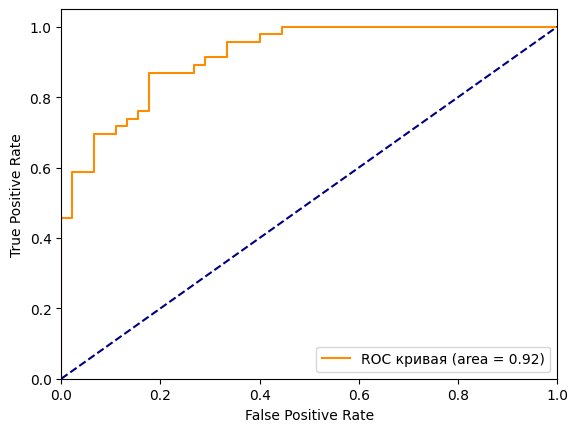

In [79]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Подсчет площади под roc кривой (кривой ошибок)
lr_probs = model_Log.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(Y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))

fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

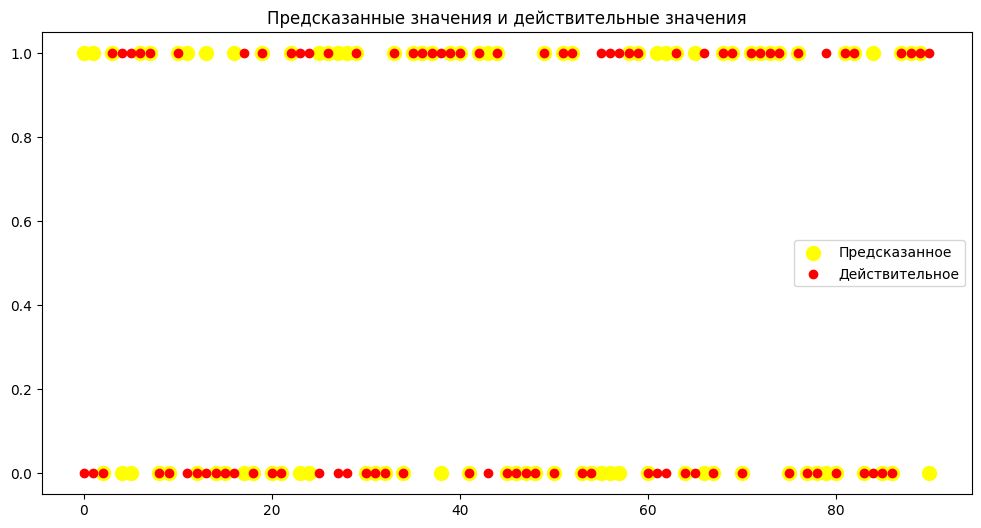

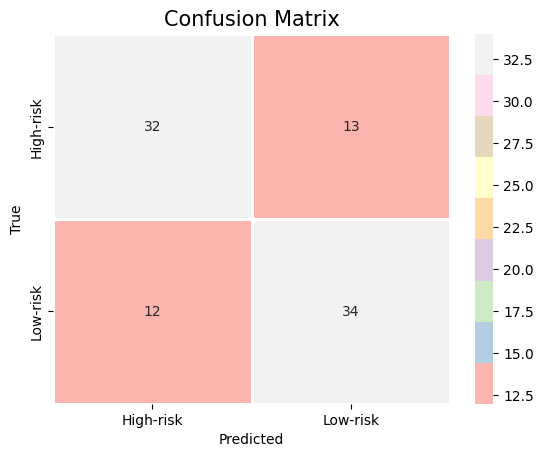

Precision: 0.723 
Recall: 0.739 
F1-Score: 0.731 
Accuracy: 72.527 %
Mean Square Error: 0.275


In [80]:
from sklearn.tree import DecisionTreeClassifier

# Создание объекта модели, которая будет обучаться
# param: random_state- Значение случайности разделения
# param: criterion- Функция измерения качества разделения
# param: max_depth- Глубина дерева
model_tree=DecisionTreeClassifier(random_state=16,criterion="gini",max_depth=6)
# model_tree=DecisionTreeClassifier(criterion="gini",max_depth=6)

# Обучение модели
model_tree.fit(X_train,Y_train)

# Предсказание модели
Y_pred=model_tree.predict(X_test)

# Определение точности предсказания
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100

# Выведение метрик
compute(Y_pred,Y_test)

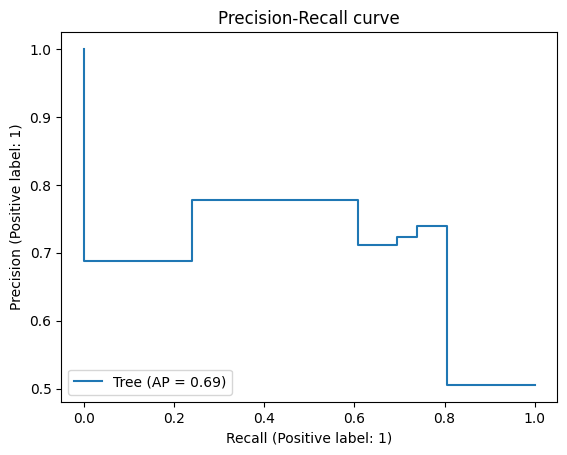

In [81]:
# Подсчет площади под pr кривой
display = PrecisionRecallDisplay.from_estimator(
    model_tree, X_test, Y_test, name="Tree"
)
_ = display.ax_.set_title("Precision-Recall curve")

model_tree: ROC AUC=0.756


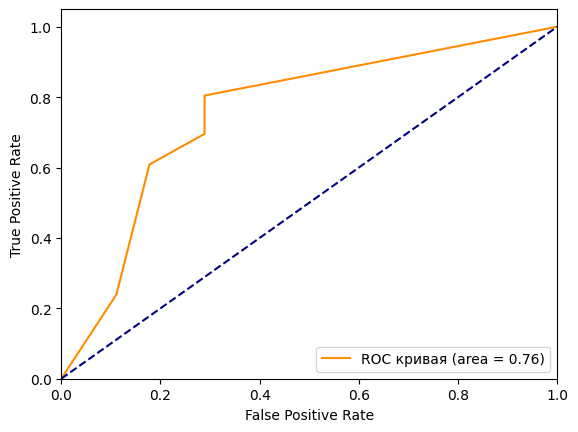

In [82]:
# Подсчет площади под roc кривой (кривой ошибок)
lr_probs = model_tree.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(Y_test, lr_probs)
print('model_tree: ROC AUC=%.3f' % (lr_auc))

fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Тестовый цикл для нахождения лучших значений для гиперпараметров для повышения итогового значения точности модели

best_accuracy = 0
best_max_depth = 0
best_estim = 0
best_criter = ''
best_random_state = 0

def show_best_values(acc, mdep, estim, criter, ranst):
    print('Accuracy: {}, max_depth: {}, estimators: {}, criterion: {}, random_state: {}'.format(acc, mdep, estim, criter, ranst))

for estim in range(107, 112):
  for criter in ['gini','entropy']:
    for max_dep in range(15, 20):
      for random_st in range(3, 9):
        # Создание модели
        model_RF = RandomForestClassifier(n_estimators=estim,criterion=criter,random_state=random_st,max_depth=max_dep, n_jobs=-1)
        # Тренировка
        model_RF.fit(X_train,Y_train)
        # Тестирование
        Y_pred=model_RF.predict(X_test)

        # Определение точности модели
        model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100

        if (model_RF_accuracy > best_accuracy):
            best_accuracy = model_RF_accuracy
            best_max_depth = max_dep
            best_estim = estim
            best_criter = criter
            best_random_state = random_st

show_best_values(best_accuracy, best_max_depth, best_estim, best_criter, best_random_state)

Accuracy: 84.61999999999999, max_depth: 15, estimators: 108, criterion: gini, random_state: 4


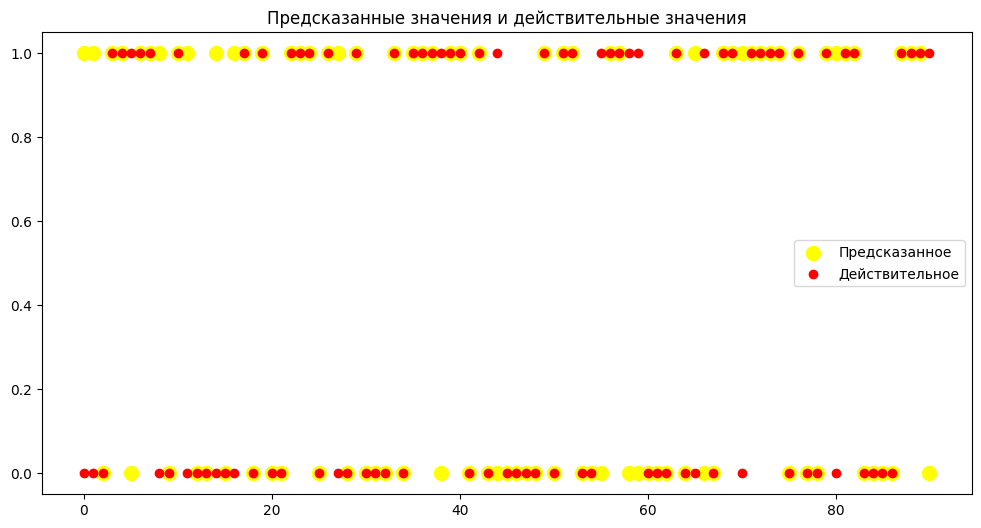

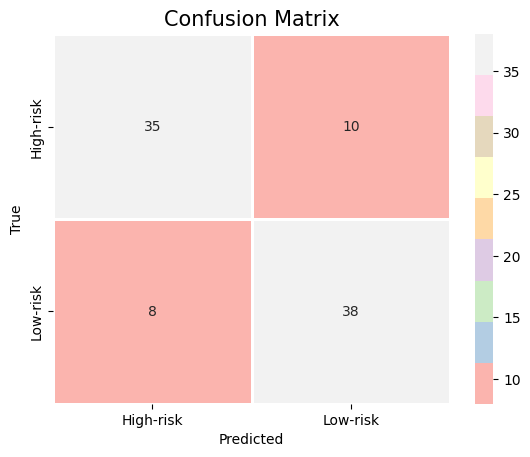

Precision: 0.792 
Recall: 0.826 
F1-Score: 0.809 
Accuracy: 80.22 %
Mean Square Error: 0.198


In [84]:
# По лучшим данным из цикла выше
# создаем модель случайного леса
model_RF = RandomForestClassifier(n_estimators=110, criterion='entropy', random_state=6, max_depth=14, n_jobs=-1)
from sklearn.metrics import roc_auc_score
# Обучаем ее
model_RF.fit(X_train, Y_train)

# Тестируем
Y_pred = model_RF.predict(X_test)

# Вычисляем точность
model_RF_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100
roc_value = roc_auc_score(Y_pred, Y_test)
# Визуалируем ожидаемые и реальные решения
compute(Y_pred,Y_test)

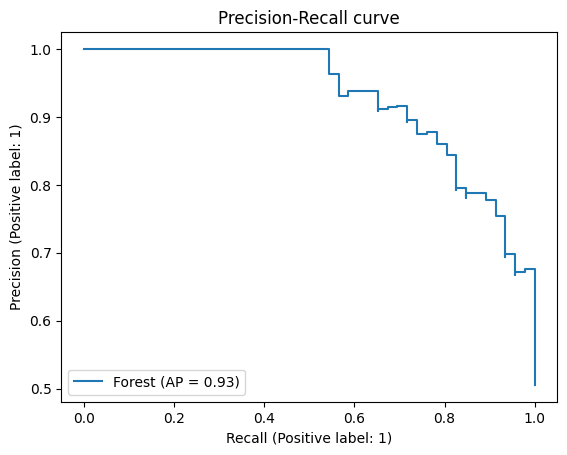

In [85]:
from sklearn.metrics import PrecisionRecallDisplay

# Подсчет площади под pr кривой
display = PrecisionRecallDisplay.from_estimator(
    model_RF, X_test, Y_test, name="Forest"
)
_ = display.ax_.set_title("Precision-Recall curve")

model_RF: ROC AUC=0.922


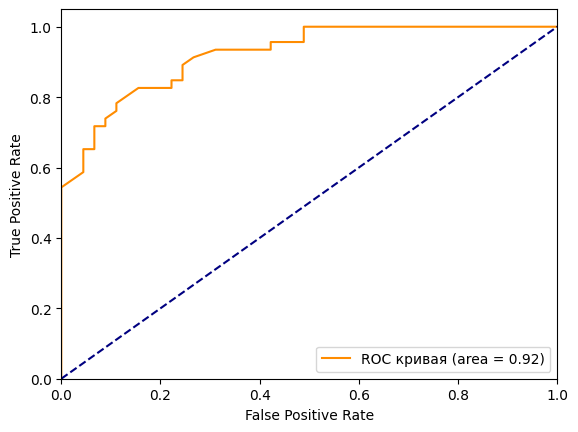

In [86]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Подсчет площади под roc кривой (кривой ошибок)
lr_probs = model_RF.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(Y_test, lr_probs)
print('model_RF: ROC AUC=%.3f' % (lr_auc))

fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()